In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 

from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_csv('train.csv')
print("shape of all data : ",df.shape)
new_df = df.sample(70000)
print(new_df.isnull().sum())
print(new_df.duplicated().sum())

shape of all data :  (404290, 6)
id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
0


In [3]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
14013,14013,26860,26861,Which are the best places to buy sarees in kol...,Which is the best place to buy great quality s...,0
110813,110813,181613,181614,How do I get unlimited coins in Asphalt 8?,Why is it so difficult to get the Asphalt 8: A...,0
393310,393310,57583,91871,Where do I find a canadian family office datab...,Where can I find a database of Canadian family...,1
14413,14413,27610,27611,How do I hide Instagram followers?,What are the Instagram following limits?,0
371306,371306,21712,69550,Why do people often ask questions in Quora whi...,Why do so many people ask soppy questions on Q...,1


In [4]:
def preprocess(q):
    q = str(q).lower().strip()
    
    q = q.replace("%",' percent ')
    q = q.replace("$",' dollar ')
    q = q.replace("₹",' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    q = q.replace(',000,000,000','b')
    q=q.replace(',000,000','m')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    q_decontracted =[]
    for word in q.split():
        if word in contractions:
            word = contractions[word]
            
        q_decontracted.append(word)
    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()
    
    return q

In [5]:
preprocess("I'm here! wasn't <b>done</b>?")

'i am here  was not done'

In [6]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [7]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
14013,14013,26860,26861,which are the best places to buy sarees in kol...,which is the best place to buy great quality s...,0,50,72
110813,110813,181613,181614,how do i get unlimited coins in asphalt 8,why is it so difficult to get the asphalt 8 a...,0,41,95
393310,393310,57583,91871,where do i find a canadian family office database,where can i find a database of canadian family...,1,49,54
14413,14413,27610,27611,how do i hide instagram followers,what are the instagram following limits,0,33,39
371306,371306,21712,69550,why do people often ask questions in quora whi...,why do so many people ask soppy questions on q...,1,78,79


In [8]:
new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
14013,14013,26860,26861,which are the best places to buy sarees in kol...,which is the best place to buy great quality s...,0,50,72,10,13
110813,110813,181613,181614,how do i get unlimited coins in asphalt 8,why is it so difficult to get the asphalt 8 a...,0,41,95,9,19
393310,393310,57583,91871,where do i find a canadian family office database,where can i find a database of canadian family...,1,49,54,9,10
14413,14413,27610,27611,how do i hide instagram followers,what are the instagram following limits,0,33,39,6,6
371306,371306,21712,69550,why do people often ask questions in quora whi...,why do so many people ask soppy questions on q...,1,78,79,14,16


In [9]:
def common_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [10]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [11]:
def total_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

new_df['word_total'] = new_df.apply(total_words,axis=1)


In [12]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
14013,14013,26860,26861,which are the best places to buy sarees in kol...,which is the best place to buy great quality s...,0,50,72,10,13,7,23,0.30
110813,110813,181613,181614,how do i get unlimited coins in asphalt 8,why is it so difficult to get the asphalt 8 a...,0,41,95,9,19,3,27,0.11
393310,393310,57583,91871,where do i find a canadian family office database,where can i find a database of canadian family...,1,49,54,9,10,7,19,0.37
14413,14413,27610,27611,how do i hide instagram followers,what are the instagram following limits,0,33,39,6,6,1,12,0.08
371306,371306,21712,69550,why do people often ask questions in quora whi...,why do so many people ask soppy questions on q...,1,78,79,14,16,7,30,0.23


### Advance Feature engineering

In [13]:
from nltk.corpus import stopwords

In [14]:
def get_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    swe  =stopwords.words("english")
    # we return 8 token features list so initialize list with 8 0's  
    token_features = [0.0]*8
    # use to not get infinite value
    SAFE_DIV=0.0001
    q1_token = q1.split()
    q2_token = q2.split()
    
    if len(q1_token)==0 or len(q2_token)==0:
        return token_features
    
    # non-stopwords in q
    q1_words = set([word for word in q1_token if word not in swe])
    q2_words = set([word for word in q2_token if word not in swe])
    
    #stopwords in q
    q1_stops = set([word for word in q1_token if word  in swe])
    q2_stops = set([word for word in q2_token if word  in swe])
    
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    common_token_count = len(set(q1_token).intersection(set(q2_token)))
    
    
    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[3]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_token),len(q2_token))+SAFE_DIV)
    token_features[5]=common_token_count/(min(len(q1_token),len(q2_token))+SAFE_DIV)
    
    # last word of q1 and q2 are same or not
    token_features[6]=int(q1_token[-1]==q2_token[-1])
    
    token_features[7]=int(q1_token[0]==q2_token[0])
    return token_features

In [15]:
token_features = new_df.apply(get_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [16]:
import distance
def get_len_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    len_features = [0.0]*3
    
    q1_token = q1.split()
    q2_token = q2.split()
    
    if len(q1_token)==0 or len(q2_token)==0:
        return len_features
    
    len_features[0]=abs(len(q1_token)-len(q2_token))
    
    len_features[1]=(len(q1_token)+len(q2_token))/2
    strs = list(distance.lcsubstrings(q1,q2))
    if len(strs)==0:
        return len_features
    len_features[2]=len(strs[0])/(min(len(q1),len(q2))+1)
    return len_features
    

In [17]:
length_features = new_df.apply(get_len_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
14013,14013,26860,26861,which are the best places to buy sarees in kol...,which is the best place to buy great quality s...,0,50,72,10,13,...,0.374995,0.799984,0.799984,0.699993,0.699993,1.0,1.0,3.0,11.5,0.294118
110813,110813,181613,181614,how do i get unlimited coins in asphalt 8,why is it so difficult to get the asphalt 8 a...,0,41,95,9,19,...,0.299997,0.000000,0.000000,0.333330,0.333330,0.0,0.0,9.0,13.5,0.238095
393310,393310,57583,91871,where do i find a canadian family office database,where can i find a database of canadian family...,1,49,54,9,10,...,0.799984,0.749981,0.749981,0.777769,0.777769,0.0,1.0,1.0,9.5,0.460000
14413,14413,27610,27611,how do i hide instagram followers,what are the instagram following limits,0,33,39,6,6,...,0.333322,0.000000,0.000000,0.166664,0.166664,0.0,0.0,0.0,6.0,0.529412
371306,371306,21712,69550,why do people often ask questions in quora whi...,why do so many people ask soppy questions on q...,1,78,79,14,16,...,0.499994,0.428565,0.428565,0.499996,0.499996,0.0,1.0,1.0,14.5,0.139241


In [18]:
from fuzzywuzzy import fuzz

def get_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
    fuzzy_features =[0.0]*4
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)    
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)    
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)    
    
    return fuzzy_features

In [19]:
fuzzy_f = new_df.apply(get_fuzzy_features,axis=1)

new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_f))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_f))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_f))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_f))

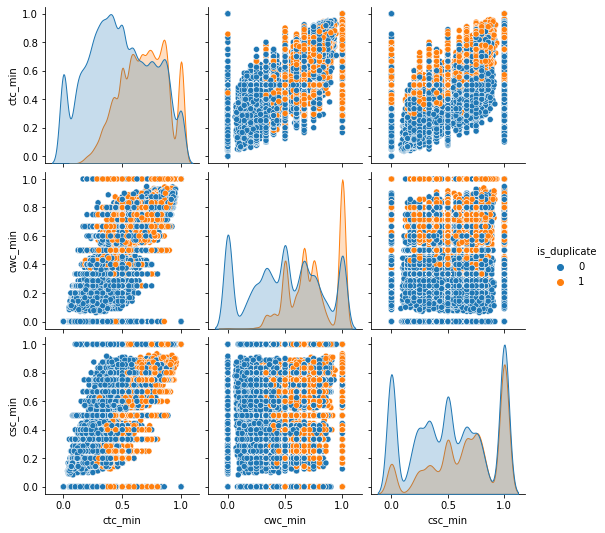

In [20]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

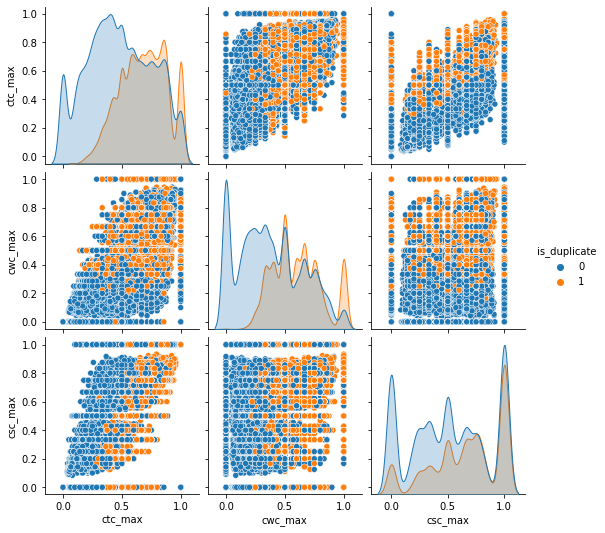

In [21]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

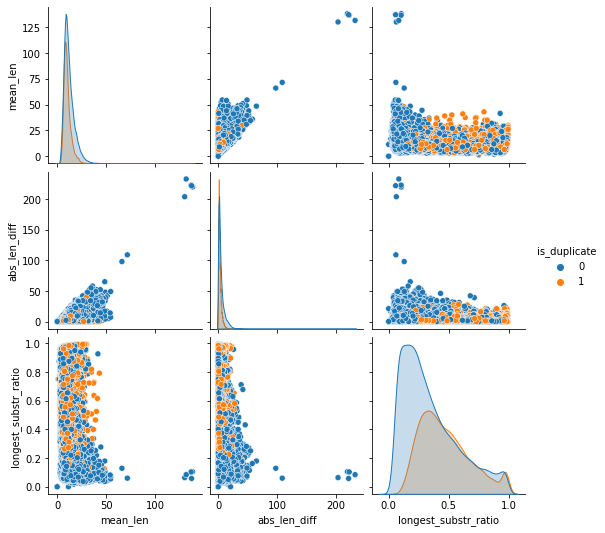

In [22]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

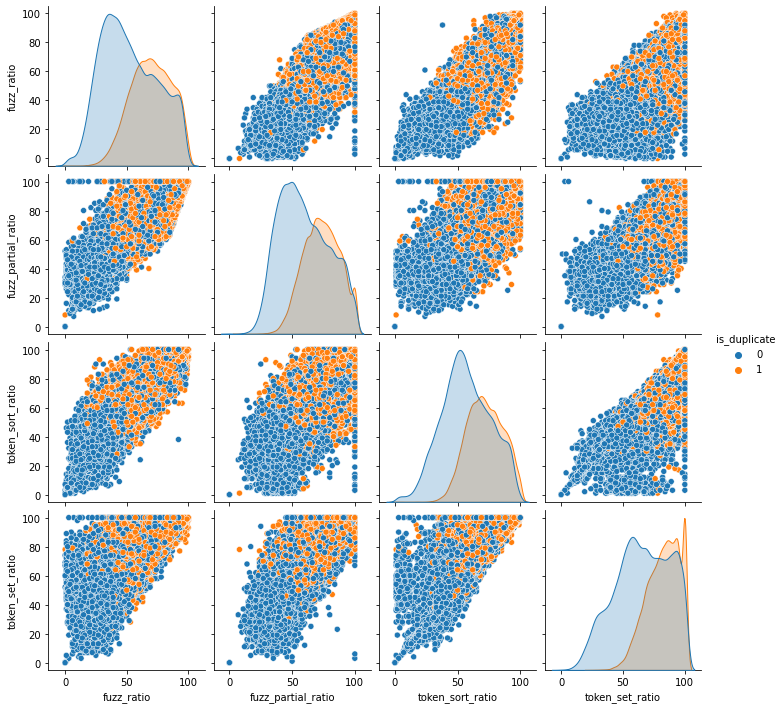

In [23]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [24]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
14013,which are the best places to buy sarees in kol...,which is the best place to buy great quality s...
110813,how do i get unlimited coins in asphalt 8,why is it so difficult to get the asphalt 8 a...
393310,where do i find a canadian family office database,where can i find a database of canadian family...
14413,how do i hide instagram followers,what are the instagram following limits
371306,why do people often ask questions in quora whi...,why do so many people ask soppy questions on q...


In [25]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(70000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
14013,0,50,72,10,13,7,23,0.30,0.599988,0.374995,...,0.699993,1.0,1.0,3.0,11.5,0.294118,72,68,69,78
110813,0,41,95,9,19,3,27,0.11,0.599988,0.299997,...,0.333330,0.0,0.0,9.0,13.5,0.238095,32,51,37,48
393310,1,49,54,9,10,7,19,0.37,0.799984,0.799984,...,0.777769,0.0,1.0,1.0,9.5,0.460000,76,69,89,93
14413,0,33,39,6,6,1,12,0.08,0.333322,0.333322,...,0.166664,0.0,0.0,0.0,6.0,0.529412,64,67,50,64
371306,1,78,79,14,16,7,30,0.23,0.666656,0.499994,...,0.499996,0.0,1.0,1.0,14.5,0.139241,65,65,73,69


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

questions =list(ques_df['question1'])+list(ques_df['question2'])

cv = TfidfVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [27]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(70000, 6000)

In [28]:
final_df = pd.concat([final_df,temp_df],axis=1)
final_df.shape

(70000, 6023)

In [29]:
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
14013,0,50,72,10,13,7,23,0.30,0.599988,0.374995,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110813,0,41,95,9,19,3,27,0.11,0.599988,0.299997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
393310,1,49,54,9,10,7,19,0.37,0.799984,0.799984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14413,0,33,39,6,6,1,12,0.08,0.333322,0.333322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
371306,1,78,79,14,16,7,30,0.23,0.666656,0.499994,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=10)


MemoryError: Unable to allocate 1.56 GiB for an array with shape (3000, 70000) and data type float64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,rf.predict(x_test))

In [ ]:
cm

In [ ]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [ ]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
def test_token_features(q1,q2):
    
    swe  =stopwords.words("english")
    # we return 8 token features list so initialize list with 8 0's  
    token_features = [0.0]*8
    # use to not get infinite value
    SAFE_DIV=0.0001
    q1_token = q1.split()
    q2_token = q2.split()
    
    if len(q1_token)==0 or len(q2_token)==0:
        return token_features
    
    # non-stopwords in q
    q1_words = set([word for word in q1_token if word not in swe])
    q2_words = set([word for word in q2_token if word not in swe])
    
    #stopwords in q
    q1_stops = set([word for word in q1_token if word  in swe])
    q2_stops = set([word for word in q2_token if word  in swe])
    
    
    common_word_count = len(q1_words.intersection(q2_words))
    
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    common_token_count = len(set(q1_token).intersection(set(q2_token)))
    
    
    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[3]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_token),len(q2_token))+SAFE_DIV)
    token_features[5]=common_token_count/(min(len(q1_token),len(q2_token))+SAFE_DIV)
    
    # last word of q1 and q2 are same or not
    token_features[6]=int(q1_token[-1]==q2_token[-1])
    
    token_features[7]=int(q1_token[0]==q2_token[0])
    return token_features

In [ ]:
def test_len_features(q1,q2):

    
    len_features = [0.0]*3
    
    q1_token = q1.split()
    q2_token = q2.split()
    
    if len(q1_token)==0 or len(q2_token)==0:
        return len_features
    
    len_features[0]=abs(len(q1_token)-len(q2_token))
    
    len_features[1]=(len(q1_token)+len(q2_token))/2
    strs = list(distance.lcsubstrings(q1,q2))
    len_features[2]=len(strs[0])/(min(len(q1),len(q2))+1)
    return len_features
    

In [ ]:
def test_fuzzy_features(q1,q2):

    fuzzy_features =[0.0]*4
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)    
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)    
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)    
    
    return fuzzy_features

In [ ]:
def query_point_creator(q1,q2):
    input_query=[]
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    input_query.extend(test_token_features(q1,q2))
    input_query.extend(test_len_features(q1,q2))
    input_query.extend(test_fuzzy_features(q1,q2))
    
    q1_bow = cv.transform([q1]).toarray()
    
   
    q2_bow = cv.transform([q2]).toarray()
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))


In [ ]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [ ]:
rf.predict(query_point_creator(q1,q4))

In [ ]:
cv

In [ ]:
rf.predict(query_point_creator(q1,q2))

In [ ]:
import pickle
pickle.dump(rf,open("model.pkl","wb"))
pickle.dump(cv,open("cv.pkl","wb"))